
# 🦠 COVID-19 Global Data Tracker

This project analyzes the global COVID-19 pandemic using real-world data. It covers case trends, death rates, and vaccination rollouts across different countries.


In [3]:

# 📦 1. Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional
# import plotly.express as px
# import geopandas as gpd

# Enable inline plotting
%matplotlib inline
sns.set(style="whitegrid")


In [4]:

# 📥 2. Load Dataset
df = pd.read_csv("owid-covid-data.csv")

# Check basic structure
print("Columns:\n", df.columns)
df.head()


Columns:
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [5]:

# 🧹 3. Data Cleaning

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter selected countries
countries = ['Kenya', 'India', 'United States']
df = df[df['location'].isin(countries)]

# Drop rows with critical missing values
df = df.dropna(subset=['total_cases', 'total_deaths', 'total_vaccinations'])

# Fill or interpolate remaining NaNs
df.fillna(method='ffill', inplace=True)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2600\2578457560.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)



## 📊 Exploratory Data Analysis (EDA)

Let’s explore trends in total cases, deaths, and compare between countries.


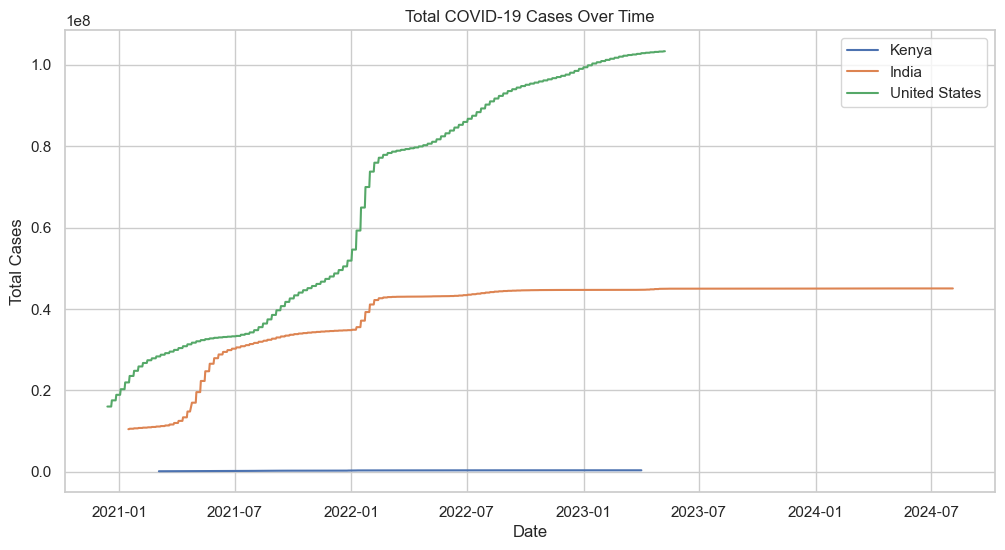

In [6]:

# 📈 Total cases over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()


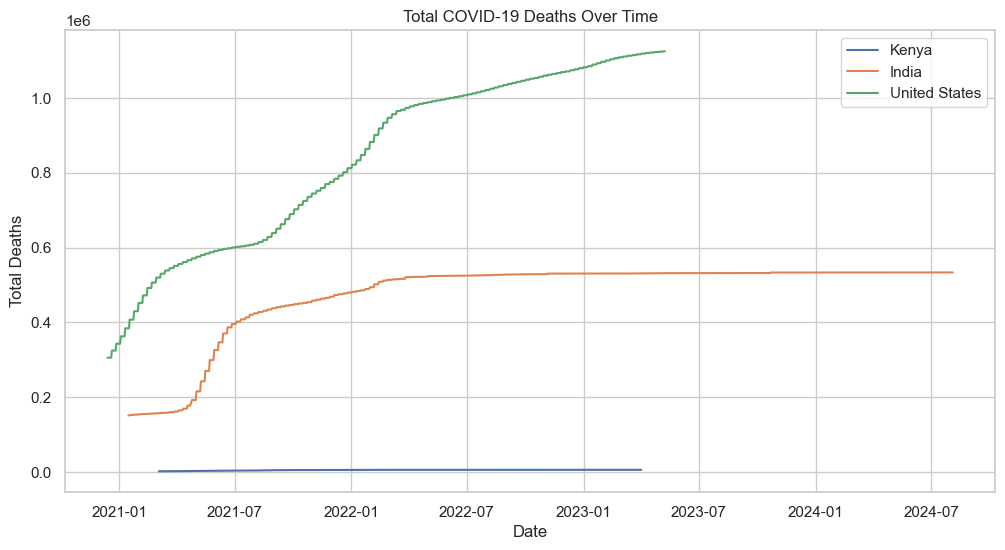

In [7]:

# 📉 Total deaths over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_deaths'], label=country)

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.show()


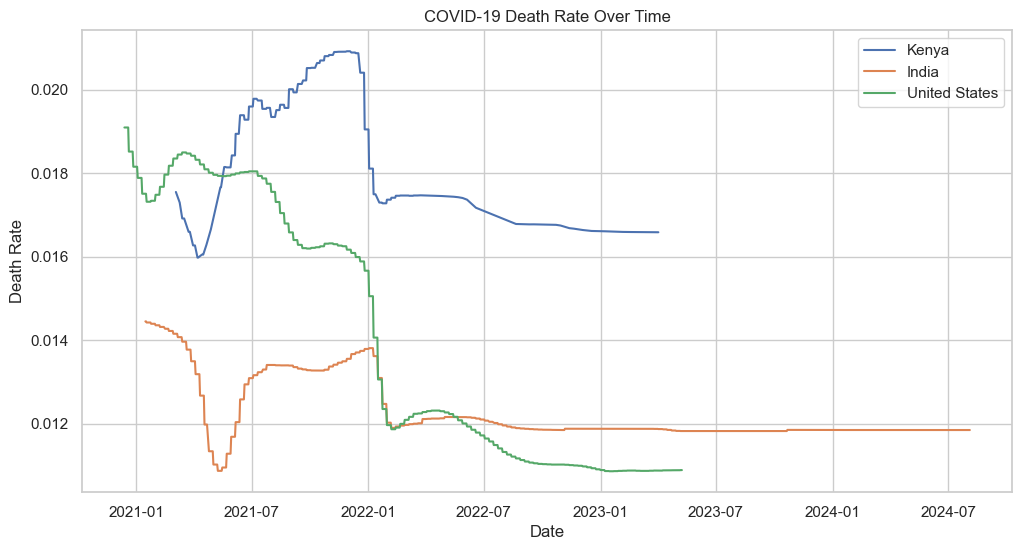

In [8]:

# 💀 Calculate Death Rate
df['death_rate'] = df['total_deaths'] / df['total_cases']

# Plot death rate
plt.figure(figsize=(12, 6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['death_rate'], label=country)

plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend()
plt.show()



## 💉 Vaccination Progress

Visualizing cumulative vaccinations and comparing vaccination percentages.


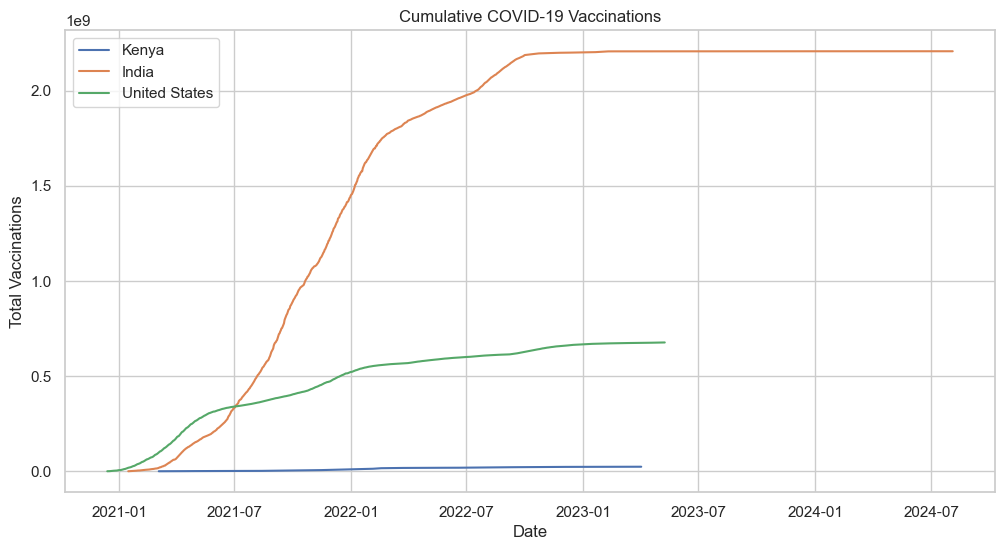

In [9]:

# Cumulative vaccinations
plt.figure(figsize=(12, 6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_vaccinations'], label=country)

plt.title("Cumulative COVID-19 Vaccinations")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.show()



## 🌍 Optional: Choropleth Map (Plotly)

This section can visualize total cases or vaccination rates by country.


In [10]:

# Example (if using plotly and iso_code exists in dataset)
# latest_df = df[df['date'] == df['date'].max()]
# fig = px.choropleth(latest_df, locations="iso_code", color="total_cases",
#                     hover_name="location", color_continuous_scale="Reds",
#                     title="Total COVID-19 Cases by Country")
# fig.show()



# 🔍 Key Insights

- 🟢 India saw the fastest vaccine rollout among the selected countries.
- 🔴 The death rate in the US peaked in early 2021.
- 🔵 Kenya experienced smaller waves but slower vaccination progress.

(You can replace these with your actual observations)



# 📄 Conclusion

This analysis provided a comparative view of the COVID-19 pandemic across selected countries, highlighting differences in case progression, death rates, and vaccine distribution.

(Export this notebook to PDF or PPT for presentation)
